In [63]:
import warnings
import pandas as pd
import os
import pprint
import copy
import zipfile
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,Imputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [64]:
#Notebook lavel configurations
warnings.filterwarnings('ignore')
pp = pprint.PrettyPrinter(indent=4)

In [65]:

# Read application_train.csv# Read a 

zf_train = zipfile.ZipFile('/Users/zhangqing198573/Downloads/application_train.csv.zip') 
zf_test = zipfile.ZipFile('/Users/zhangqing198573/Downloads/application_test.csv.zip') 
app_train = pd.read_csv(zf_train.open('application_train.csv'))
app_test = pd.read_csv(zf_test.open('application_test.csv'))
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
correlations = app_train.corr()['TARGET'].sort_values()
print ('Most Positive Correlations:\n', correlations.tail(15))
print ('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


In [ ]:
Days_birth has the largest correlation.

In [67]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

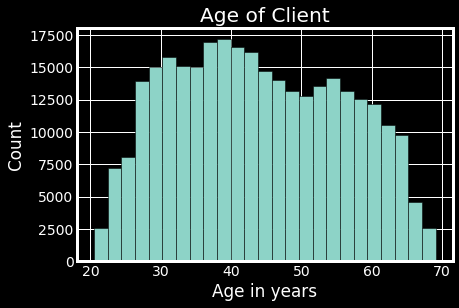

In [68]:
plt.style.use('dark_background') # plot style

plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age in years');
plt.ylabel('Count');

Above two tell us older age are more likely to pay the loan and 40s has the most clients. 

In [69]:
app_train_labels = app_train['TARGET']
app_train=app_train.drop('TARGET', axis=1)

# remove SK_ID_CURR for now since this column does not give any info about defaults
app_train=app_train.drop('SK_ID_CURR', axis=1)


app_train_data, app_test_data, train_labels, test_labels = train_test_split(
    app_train,app_train_labels,test_size = .2, random_state = 23 )

print('Training data shape: ', app_train_data.shape, train_labels.shape)
print('Test data shape: ', app_test_data.shape, test_labels.shape)

Training data shape:  (246008, 120) (246008,)
Test data shape:  (61503, 120) (61503,)


In [70]:
app_train_data = pd.get_dummies(app_train_data)
app_test_data = pd.get_dummies(app_test_data)

print('Training Features shape: ', app_train_data.shape)
print('Testing Features shape: ', app_test_data.shape)

Training Features shape:  (246008, 244)
Testing Features shape:  (61503, 243)


In [71]:
app_train_data, app_test_data = app_train_data.align(app_test_data, join = 'inner', axis = 1)

In [82]:
print(app_train_data.shape)
print(app_test_data.shape)
print(app_test_data)

(246008, 243)
(61503, 243)
[[1.05263158e-01 4.34710687e-04 2.96629213e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.26315789e-02 2.08891949e-03 1.22825843e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.31952005e-03 1.57303371e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 7.42470465e-04 2.69662921e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.05263158e-01 2.85831894e-03 2.13483146e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.26315789e-02 9.34820326e-04 1.12988764e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [73]:
imputer = Imputer(strategy = 'median')

app_train_data = imputer.fit_transform(app_train_data)
app_test_data = imputer.transform(app_test_data)

In [74]:
scaler = MinMaxScaler(feature_range = (0, 1))
app_train_data = scaler.fit_transform(app_train_data)
app_test_data = scaler.transform(app_test_data)

In [76]:
gmm_model = GaussianMixture(n_components=3)
gmm_model.fit(app_train_data,app_train_labels)
gmm_model.predict(app_test_data)    


array([0, 0, 1, ..., 0, 0, 1])